`models.explainers` multi label classification example (iris dataset)
-----

### Load packages

In [1]:
from transparentai.models import explainers
from transparentai.datasets import load_iris

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Load & prepare data

In [2]:
data = load_iris()
X, Y = data.drop(columns='iris plant'), data['iris plant']

In [3]:
Y = Y.replace({'setosa':0, 'versicolor':1, 'virginica':2})

Split train test

In [4]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

### Train classifier

In [5]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Use `models.explainers.ModelExplainer` 

In [6]:
explainer = explainers.ModelExplainer(clf, X_train, model_type='tree', multi_label=True)

In [7]:
explainer.explain_global_influence(X_train)

{0: {'sepal length (cm)': 0.021099666141788466,
  'sepal width (cm)': 0.008565333154657857,
  'petal length (cm)': 0.18234799604923466,
  'petal width (cm)': 0.18979366254233768},
 1: {'sepal length (cm)': 0.027469499409361747,
  'sepal width (cm)': 0.014987166443769816,
  'petal length (cm)': 0.20845049517555153,
  'petal width (cm)': 0.21006982875424435},
 2: {'sepal length (cm)': 0.024785166181391104,
  'sepal width (cm)': 0.016156833266536705,
  'petal length (cm)': 0.2064978286657714,
  'petal width (cm)': 0.19626916254216342}}

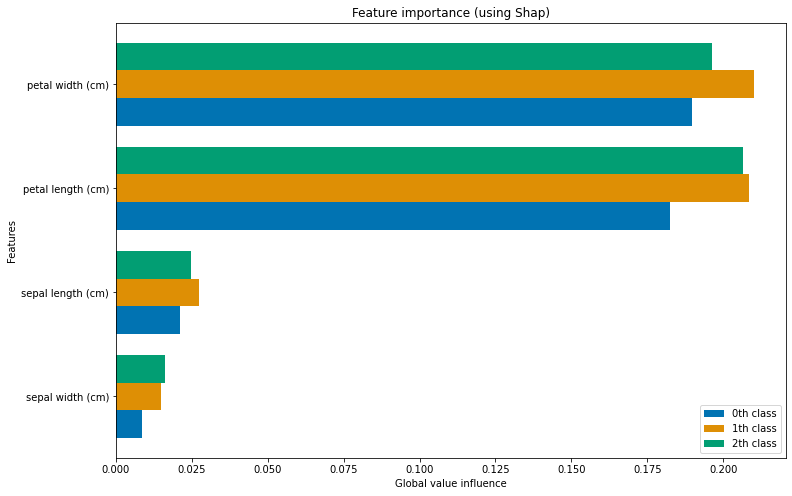

In [8]:
explainer.plot_global_explain()

In [9]:
explainer.explain_local_influence(X_valid.iloc[0])

{0: {'sepal length (cm) = 6.1': -0.013233333039097487,
  'sepal width (cm) = 2.8': -0.00736666651442647,
  'petal length (cm) = 4.7': -0.10606666429433971,
  'petal width (cm) = 1.2': -0.11333333079703152},
 1: {'sepal length (cm) = 6.1': 0.028283332621213048,
  'sepal width (cm) = 2.8': 0.011483332994394004,
  'petal length (cm) = 4.7': 0.29891665967181325,
  'petal width (cm) = 1.2': 0.2697166605223902},
 2: {'sepal length (cm) = 6.1': -0.015049999433103948,
  'sepal width (cm) = 2.8': -0.004116666445042938,
  'petal length (cm) = 4.7': -0.19284999534953384,
  'petal width (cm) = 1.2': -0.15638332961825654}}

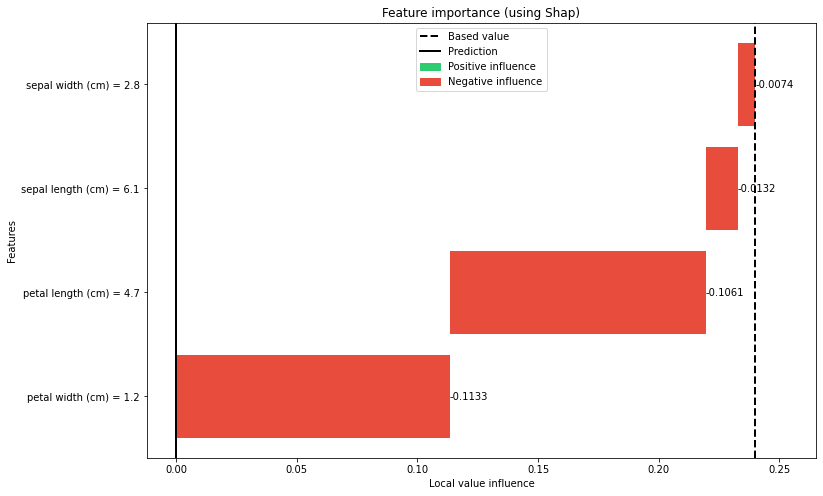

In [12]:
explainer.plot_local_explain(X_valid.iloc[0], num_class=0)

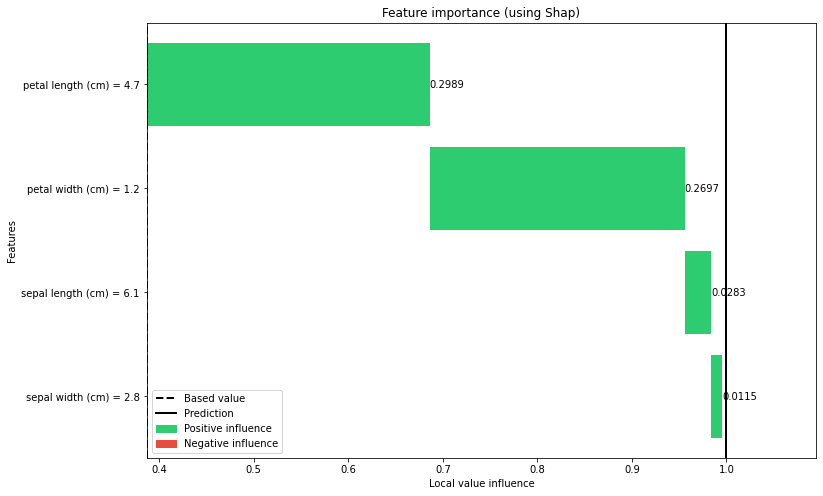

In [13]:
explainer.plot_local_explain(X_valid.iloc[0], num_class=1)

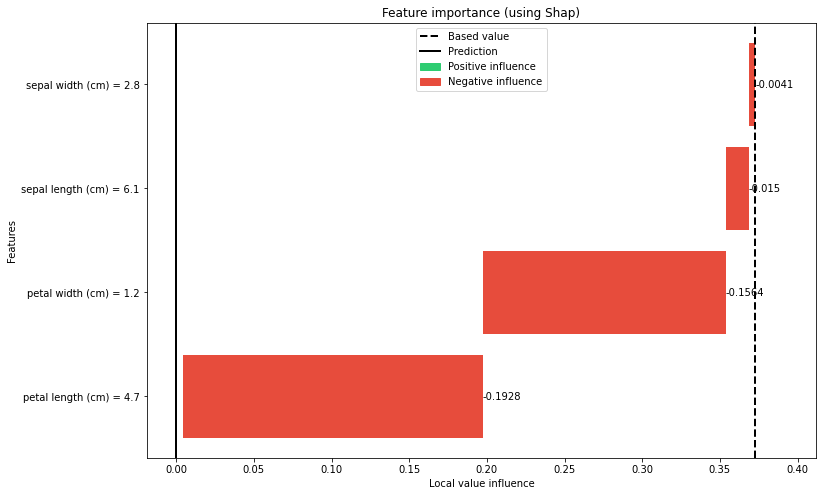

In [14]:
explainer.plot_local_explain(X_valid.iloc[0], num_class=2)